--------------
## 1.딥러닝 모델로 회귀 문제 해결하기



### 1-1.문제 정의(회귀 문제)


### 1-2.데이터 수집(국방부 데이터 이용)
- 육군 신체측정정보 데이터
- https://opendata.mnd.go.kr/openinf/sheetview2.jsp?infId=OA-9425

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/육군 신체측정정보.csv', encoding='cp949')
df

<ipython-input-71-da680d194aa4>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/육군 신체측정정보.csv', encoding='cp949')


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167979,167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167980,167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg
167981,167982,20170131,85.3 cm,86.8 cm,173.6 cm,75.9 cm (29.9 in),76.6 cm,57.6 cm,24.3 cm,57.4 kg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167983 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   순번          167983 non-null  int64 
 1   측정 일자       167983 non-null  int64 
 2   가슴 둘레 센티미터  167982 non-null  object
 3   소매길이 센티미터   167983 non-null  object
 4   신장 센티미터     167983 non-null  object
 5   허리 둘레 센티미터  167983 non-null  object
 6   샅높이 센티미터    167983 non-null  object
 7   머리 둘레 센티미터  167981 non-null  object
 8   발 길이 센티미터   167983 non-null  object
 9   몸무게 킬로그램    167983 non-null  object
dtypes: int64(2), object(8)
memory usage: 12.8+ MB


###1-3. 데이터 전처리

#### 결측값 제거

In [ ]:
df.dropna(axis=0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   순번          167980 non-null  int64 
 1   측정 일자       167980 non-null  int64 
 2   가슴 둘레 센티미터  167980 non-null  object
 3   소매길이 센티미터   167980 non-null  object
 4   신장 센티미터     167980 non-null  object
 5   허리 둘레 센티미터  167980 non-null  object
 6   샅높이 센티미터    167980 non-null  object
 7   머리 둘레 센티미터  167980 non-null  object
 8   발 길이 센티미터   167980 non-null  object
 9   몸무게 킬로그램    167980 non-null  object
dtypes: int64(2), object(8)
memory usage: 14.1+ MB


#### 'cm' 등 불필요한 문자열 제거

In [ ]:
df['가슴 둘레 센티미터'].apply(lambda x: float(str(x).split()[0]))

0          96.3
1         101.9
2          99.5
3          98.6
4          94.7
          ...  
167978    100.6
167979     97.9
167980     97.9
167981     85.3
167982     86.6
Name: 가슴 둘레 센티미터, Length: 167980, dtype: float64

In [ ]:
cmPreprocessing = ['가슴 둘레 센티미터','소매길이 센티미터', '신장 센티미터', '허리 둘레 센티미터', '샅높이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터', '몸무게 킬로그램']

In [ ]:
for col in cmPreprocessing:
    df[col] = df[col].apply(lambda x: float(str(x).split()[0]))

In [ ]:
df.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


#### 몸무게 킬로그램 이상치 확인 및 분리

- 몸무게가 누락된 샘플의 몸무게를 딥러닝 회귀 모델로 되찾아주자!

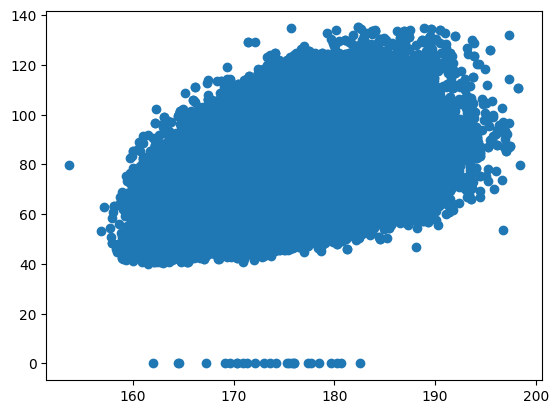

In [ ]:
x = df['신장 센티미터']
y = df['몸무게 킬로그램']

import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

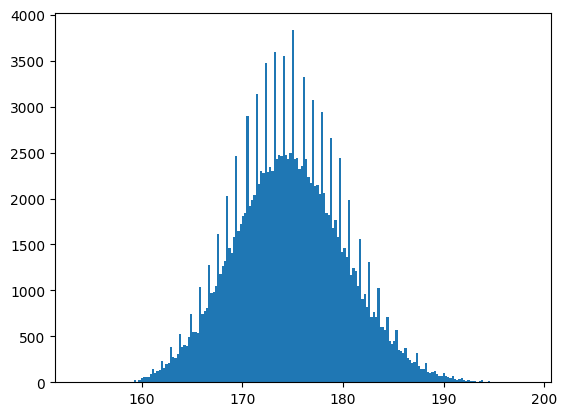

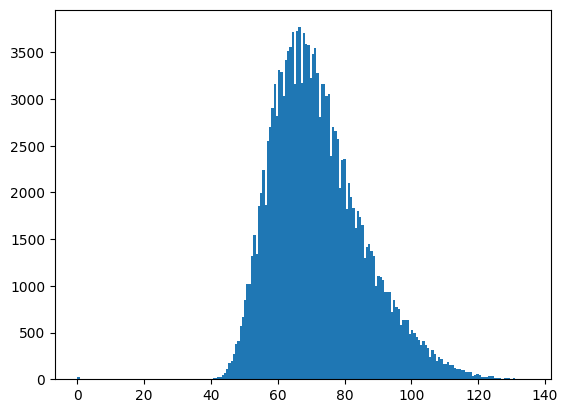

In [ ]:
import matplotlib.pyplot as plt
plt.hist(x, bins = 200)
plt.show()
plt.hist(y, bins = 200)
plt.show()

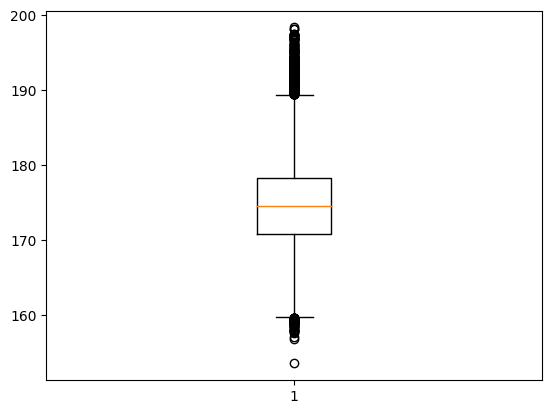

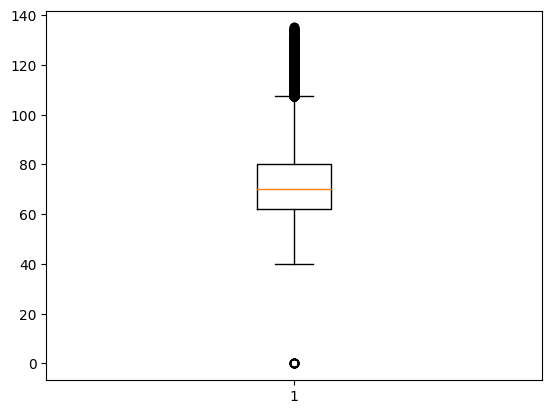

In [ ]:
plt.boxplot(x)
plt.show()
plt.boxplot(y)
plt.show()

In [ ]:
# 몸무게가 10kg 미만인 국군장병을 확인해보자
len(df[df['몸무게 킬로그램']<10])

26

In [ ]:
# 몸무게가 10kg 미만인 이상치 데이터 분리
ghosts = df[df['몸무게 킬로그램']<10]

In [ ]:
# 몸무게 이상치 제외한 샘플을 df에 대입하기
df = df[df['몸무게 킬로그램']>10]

In [ ]:
# 몸무게와 다른 칼럼간 상관관계 확인하기
df.corr()['몸무게 킬로그램'].sort_values(ascending = False)

몸무게 킬로그램      1.000000
가슴 둘레 센티미터    0.893750
허리 둘레 센티미터    0.869775
샅높이 센티미터      0.490937
신장 센티미터       0.403038
소매길이 센티미터     0.401077
머리 둘레 센티미터    0.360277
발 길이 센티미터     0.344661
순번            0.020382
측정 일자         0.019323
Name: 몸무게 킬로그램, dtype: float64

In [ ]:
# 학습 데이터, 레이블 분리하기
from sklearn.model_selection import train_test_split

x = df.drop(columns=['순번','측정 일자','몸무게 킬로그램'])
y = df['몸무게 킬로그램']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156)

In [ ]:
x_train.head()

,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터
87465,82.5,88.0,175.8,72.8,79.8,57.8,27.3
121127,90.4,91.0,181.1,89.8,83.4,54.8,25.4
7635,102.7,87.9,175.6,85.7,77.3,56.6,26.1
68798,104.9,85.6,171.8,102.5,79.0,58.4,26.8
80685,94.5,88.6,177.2,88.6,82.6,61.5,26.2


In [ ]:
x_train.shape

(134363, 7)

In [ ]:
y_train.head()

87465     54.8
121127    68.9
7635      71.4
68798     92.7
80685     67.2
Name: 몸무게 킬로그램, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_train.shape

(134363, 7)

In [ ]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled.shape

(33591, 7)

### 1-4. Dropout을 이용한 모델 학습

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
NB_EPOCHS = 5
BATCH_SIZE = 128

## 모델 정의
model1 = Sequential()

model1.add(Dense(64, input_dim=x_train.shape[-1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))

# 모델 컴파일
model1.compile(loss='MSE',optimizer = 'adam',metrics = ['mae'])

In [ ]:
# 모델 학습
# verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch
history1 = model1.fit(x_train_scaled, y_train,validation_data=(x_test_scaled, y_test),epochs=NB_EPOCHS,batch_size=BATCH_SIZE, verbose=2)

Epoch 1/5
1050/1050 - 5s - loss: 641.5655 - mae: 18.2466 - val_loss: 88.2749 - val_mae: 8.3410 - 5s/epoch - 5ms/step
Epoch 2/5
1050/1050 - 3s - loss: 219.0107 - mae: 11.5826 - val_loss: 36.6663 - val_mae: 4.6304 - 3s/epoch - 3ms/step
Epoch 3/5
1050/1050 - 4s - loss: 137.9679 - mae: 9.0992 - val_loss: 87.8782 - val_mae: 8.0307 - 4s/epoch - 4ms/step
Epoch 4/5
1050/1050 - 4s - loss: 84.6590 - mae: 7.0341 - val_loss: 91.9275 - val_mae: 8.3267 - 4s/epoch - 3ms/step
Epoch 5/5
1050/1050 - 4s - loss: 54.1930 - mae: 5.5404 - val_loss: 66.6167 - val_mae: 6.8526 - 4s/epoch - 3ms/step


### 1-5. 모델 평가

In [ ]:
# 학습 결과 그래프 출력
def modelplot(history, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title('Model '+ data)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()

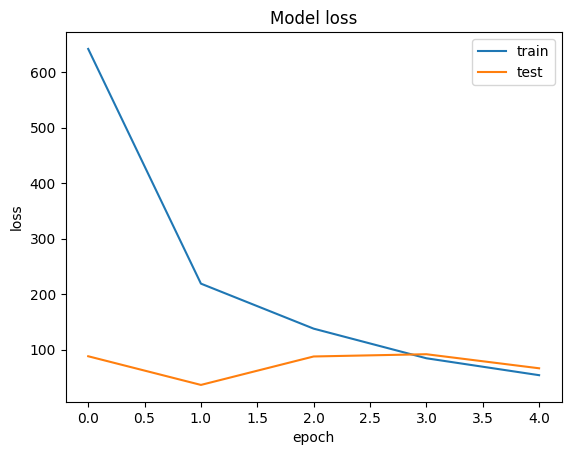

In [ ]:
modelplot(history1, 'loss', 'val_loss')

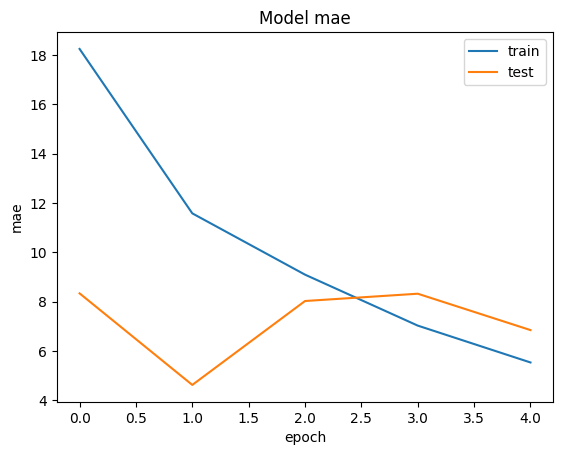

In [ ]:
modelplot(history1, 'mae', 'val_mae')

In [ ]:
# model.evaluate로 평가하기
score = model1.evaluate(x=x_test_scaled, y=y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

1050/1050 [==============================] - 3s 3ms/step - loss: 66.6166 - mae: 6.8526
Test loss: 66.61661529541016
Test mae: 6.8525896072387695


### 1-6. 예측하고자 하는 칼럼과 상관관계가 높은 칼럼 4가지만 이용한 모델 학습 및 평가

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['순번','측정 일자','몸무게 킬로그램', '소매길이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터'])
y = df['몸무게 킬로그램']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156)

In [ ]:
x_train.head()

,가슴 둘레 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터
87465,82.5,175.8,72.8,79.8
121127,90.4,181.1,89.8,83.4
7635,102.7,175.6,85.7,77.3
68798,104.9,171.8,102.5,79.0
80685,94.5,177.2,88.6,82.6


In [ ]:
x_train.shape

(134363, 4)

In [ ]:
y_train.head()

87465     54.8
121127    68.9
7635      71.4
68798     92.7
80685     67.2
Name: 몸무게 킬로그램, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
x_train.shape

(134363, 4)

In [ ]:
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled.shape

(33591, 4)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
NB_EPOCHS = 5  # num of epochs
BATCH_SIZE = 128

## 모델 정의
model2 = Sequential()

model2.add(Dense(64, input_dim=x_train.shape[-1], activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))

# 모델 컴파일
model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
# 모델 학습
# verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch
history2 = model2.fit(x_train_scaled, y_train,
                      validation_data=(x_test_scaled, y_test),
                      epochs=NB_EPOCHS,
                      batch_size=BATCH_SIZE, verbose=2)

Epoch 1/5
1050/1050 - 5s - loss: 667.5891 - mae: 18.5517 - val_loss: 115.3966 - val_mae: 9.7677 - 5s/epoch - 5ms/step
Epoch 2/5
1050/1050 - 4s - loss: 186.4223 - mae: 10.5879 - val_loss: 34.2045 - val_mae: 4.4890 - 4s/epoch - 4ms/step
Epoch 3/5
1050/1050 - 4s - loss: 85.7278 - mae: 7.0501 - val_loss: 54.8035 - val_mae: 5.7565 - 4s/epoch - 3ms/step
Epoch 4/5
1050/1050 - 3s - loss: 53.6161 - mae: 5.5021 - val_loss: 50.0947 - val_mae: 5.4831 - 3s/epoch - 3ms/step
Epoch 5/5
1050/1050 - 4s - loss: 40.6769 - mae: 4.7987 - val_loss: 57.5602 - val_mae: 5.6631 - 4s/epoch - 3ms/step


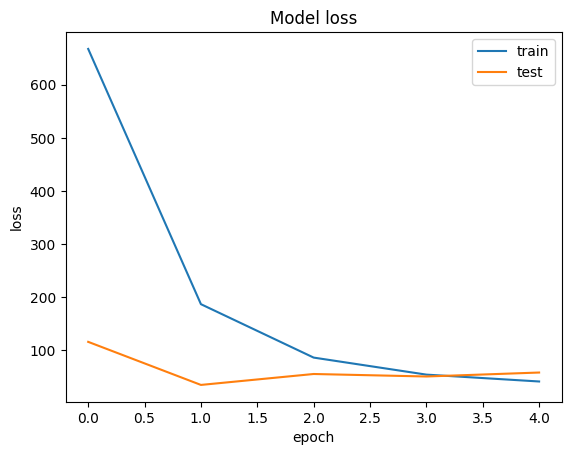

In [ ]:
modelplot(history2, 'loss', 'val_loss')

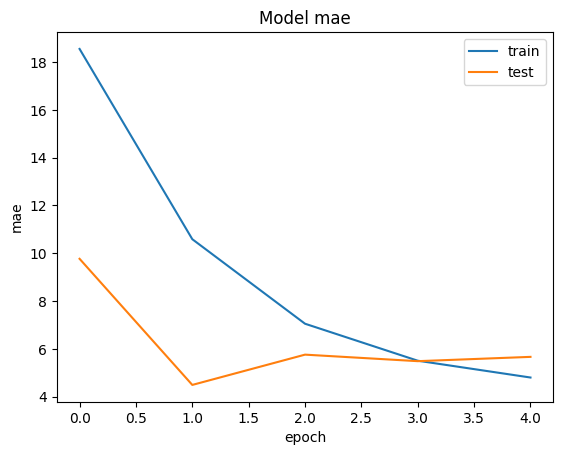

In [ ]:
modelplot(history2, 'mae', 'val_mae')

In [ ]:
# model.evaluate로 평가하기
score = model2.evaluate(x=x_test_scaled, y=y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

1050/1050 [==============================] - 3s 3ms/step - loss: 57.5602 - mae: 5.6631
Test loss: 57.56017303466797
Test mae: 5.663122653961182


### 1-7. Batch Normalization

- 학습 과정에서 각 배치 단위 별로 데이터가 다양한 분포를 가지더라도 각 배치별로 평균과 분산을 이용해 정규화하는 것
- batch 단위나 layer에 따라서 입력 값의 분포가 모두 다르지만 정규화를 통하여 분포를 zero mean gaussian 형태로 만듦(평균은 0, 표준 편차는 1로 데이터의 분포를 조정)

<img src="https://gaussian37.github.io/assets/img/dl/concept/batchnorm/4.png" width=500px>

In [ ]:
from keras.layers import BatchNormalization

NB_EPOCHS = 5  # num of epochs
BATCH_SIZE = 128

## 모델 정의
model3 = Sequential()

model3.add(Dense(64, input_dim=x_train.shape[-1], activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(1))

# 모델 컴파일
model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
# 모델 학습
# verbose: 0 = silent, 1 = progress bar, 2 = one line per epoch
history3 = model3.fit(x_train_scaled, y_train,
                      validation_data=(x_test_scaled, y_test),
                      epochs=NB_EPOCHS,
                      batch_size=BATCH_SIZE, verbose=2)

Epoch 1/5
1050/1050 - 8s - loss: 2990.7375 - mae: 50.8000 - val_loss: 242.1473 - val_mae: 14.7609 - 8s/epoch - 8ms/step
Epoch 2/5
1050/1050 - 6s - loss: 244.8340 - mae: 12.3822 - val_loss: 29.5576 - val_mae: 4.2193 - 6s/epoch - 6ms/step
Epoch 3/5
1050/1050 - 5s - loss: 200.7352 - mae: 11.1351 - val_loss: 42.9108 - val_mae: 5.3584 - 5s/epoch - 5ms/step
Epoch 4/5
1050/1050 - 6s - loss: 196.5474 - mae: 11.0063 - val_loss: 47.4720 - val_mae: 5.6996 - 6s/epoch - 6ms/step
Epoch 5/5
1050/1050 - 5s - loss: 193.9566 - mae: 10.9393 - val_loss: 43.8129 - val_mae: 5.4254 - 5s/epoch - 5ms/step


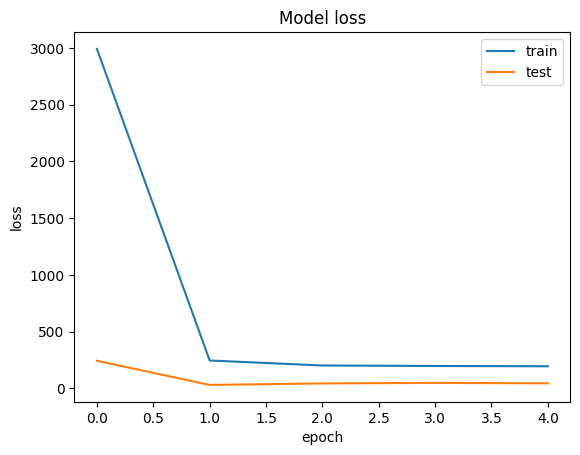

In [ ]:
modelplot(history3, 'loss', 'val_loss')

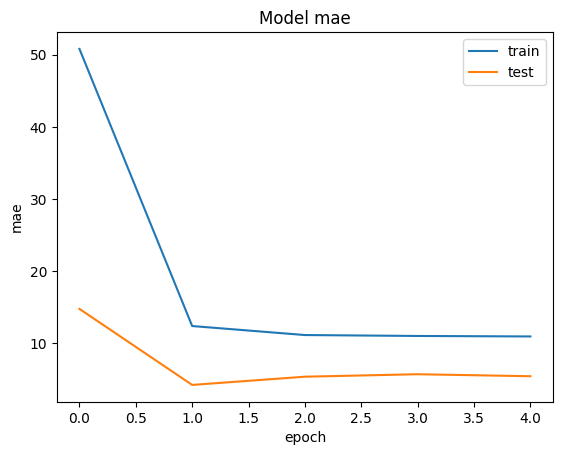

In [ ]:
modelplot(history3, 'mae', 'val_mae')

In [ ]:
# model.evaluate로 평가하기
score = model3.evaluate(x=x_test_scaled, y=y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

1050/1050 [==============================] - 3s 3ms/step - loss: 43.8129 - mae: 5.4254
Test loss: 43.812931060791016
Test mae: 5.425445556640625


### 1-8. MSE, MAE가 가장 낮은 모델로 몸무게 예측하여 이상치 대체하기

In [ ]:
model2.predict(x_test_scaled)

1050/1050 [==============================] - 2s 2ms/step


array([[82.90287 ],
       [67.58078 ],
       [90.540504],
       ...,
       [76.347404],
       [66.380424],
       [77.92943 ]], dtype=float32)

In [ ]:
ghosts_x = ghosts.drop(columns=['순번','측정 일자','몸무게 킬로그램', '소매길이 센티미터', '머리 둘레 센티미터', '발 길이 센티미터'])
ghosts_x_scaled = scaler.fit_transform(ghosts_x)

In [ ]:
model2.predict(ghosts_x_scaled)

1/1 [==============================] - 0s 82ms/step


array([[ 67.4395  ],
       [ 62.4658  ],
       [ 62.32068 ],
       [ 64.31655 ],
       [ 64.967926],
       [ 60.05714 ],
       [ 71.203064],
       [ 79.85505 ],
       [ 70.82518 ],
       [ 75.40777 ],
       [ 83.28327 ],
       [ 58.35335 ],
       [ 84.56187 ],
       [ 75.36885 ],
       [ 71.18613 ],
       [ 62.169445],
       [ 64.44348 ],
       [ 83.46211 ],
       [ 69.221466],
       [ 61.810425],
       [ 67.6837  ],
       [ 83.93649 ],
       [100.83244 ],
       [ 96.266716],
       [ 70.31308 ],
       [ 87.819435]], dtype=float32)

In [ ]:
ghosts['몸무게 킬로그램'] = np.round(model2.predict(ghosts_x_scaled),2)
ghosts

1/1 [==============================] - 0s 26ms/step


<ipython-input-121-d40d6f2f3ae4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ghosts['몸무게 킬로그램'] = np.round(model2.predict(ghosts_x_scaled),2)


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
149764,149765,20160923,91.1,83.9,167.2,81.2,73.8,56.5,24.9,67.440002
149781,149782,20160923,100.1,81.1,162.0,58.9,71.2,58.3,9.8,62.470001
149789,149790,20160923,88.1,90.2,179.7,74.5,79.4,3998.0,27.4,62.320000
149792,149793,20160923,88.6,88.8,177.7,78.1,78.2,55.0,25.3,64.320000
149796,149797,20160923,88.8,85.7,171.3,79.1,75.4,55.0,25.6,64.970001
149798,149799,20160923,86.7,87.8,175.8,71.6,77.4,56.7,26.8,60.060001
149799,149800,20160923,74.9,84.1,169.1,119.7,74.5,55.2,1.0,71.199997
149800,149801,20160923,101.3,85.2,169.6,94.7,74.8,56.6,26.1,79.860001
149801,149802,20160923,93.1,90.5,180.3,85.0,79.6,54.8,26.5,70.830002
149802,149803,20160923,99.0,88.0,176.0,86.7,77.4,57.3,25.6,75.410004
